In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# nodes = pd.read_csv("nodes_fix_filtered.csv")
edges = pd.read_csv("dataset.csv")

In [4]:
edges.head()

,source,target
0,muhammadfaizan,kentcdodds
1,kentcdodds,denysdovhan
2,kentcdodds,smamran
3,kentcdodds,davegomez
4,kentcdodds,iamnapo


In [5]:
network = nx.from_pandas_edgelist(edges, 'source', 'target')

In [6]:
leigen_comm = pd.read_csv("./Communities/g_Leigen_communities.csv")
leigen_comm.head()

,id,communities
0,muhammadfaizan,1
1,kentcdodds,1
2,minrk,111
3,meyskens,111
4,kinvix,1


In [8]:
leigen_comm['communities'].value_counts()

communities
1      4762
112    4751
111    2763
30        9
40        5
       ... 
36        2
35        2
32        2
29        2
110       2
Name: count, Length: 112, dtype: int64

In [25]:
diff =  leigen_comm['communities'].value_counts().values[0] - leigen_comm['communities'].value_counts().values[1]
diff
ratio =  leigen_comm['communities'].value_counts().values[0] / leigen_comm['communities'].value_counts().values[1]
ratio

1.0023153020416755

In [89]:
count = leigen_comm['communities'].value_counts().reset_index().rename(columns={"index": "communities", 'communities': "count"})

In [88]:
count

,count,count
0,1,4762
1,112,4751
2,111,2763
3,30,9
4,40,5
...,...,...
107,36,2
108,35,2
109,32,2
110,29,2


(112, 112, 112)

In [65]:
cliques_3 = [clique for clique in nx.find_cliques(network) if len(clique) == 5]
cliques_3

[['thiagodelgado111', 'sibelius', 'thebergamo', 'bevacqua', 'mikeal'],
 ['alyakhtar', 'hammadhaleem', 'rootAvish', 'nickedes', 'agr-shrn'],
 ['mappum', 'mafintosh', 'mikeal', 'mcanthony', 'bcomnes'],
 ['mappum', 'mafintosh', 'mikeal', 'mcanthony', 'kustomzone'],
 ['mappum', 'mafintosh', 'mikeal', 'bcherny', 'bcomnes'],
 ['mappum', 'mafintosh', 'mikeal', 'bcherny', 'Planeshifter'],
 ['mappum', 'mafintosh', 'mikeal', 'emilbayes', 'jonnydubowsky'],
 ['mappum', 'mafintosh', 'mikeal', 'martindale', 'jonnydubowsky'],
 ['Natumsol', 'fengmk2', 'sorrycc', 'dwqs', 'RubyLouvre'],
 ['itspriddle', 'SuriyaaKudoIsc', 'gabrielpconceicao', 'Natshah', 'jmazzi'],
 ['ded', 'gabrielpconceicao', 'mcanthony', 'shawnbot', 'radovankavicky'],
 ['ded', 'gabrielpconceicao', 'mcanthony', 'Qard', 'shovon'],
 ['felipenmoura',
  'dielduarte',
  'millermedeiros',
  'gabrielpconceicao',
  'suissa'],
 ['felipenmoura',
  'keppelen',
  'afonsopacifer',
  'fabricionaweb',
  'talitapagani'],
 ['felipenmoura', 'keppelen', 'a

In [66]:
# Print the cliques
print(len(cliques_3))

1488


In [67]:
cliques_3
# # Use set to collect unique values
# unique_values = set(item for sublist in cliques_9 for item in sublist)

# # Convert the set back to a list if needed
# unique_values_list = list(unique_values)

# print(unique_values_list)

[['thiagodelgado111', 'sibelius', 'thebergamo', 'bevacqua', 'mikeal'],
 ['alyakhtar', 'hammadhaleem', 'rootAvish', 'nickedes', 'agr-shrn'],
 ['mappum', 'mafintosh', 'mikeal', 'mcanthony', 'bcomnes'],
 ['mappum', 'mafintosh', 'mikeal', 'mcanthony', 'kustomzone'],
 ['mappum', 'mafintosh', 'mikeal', 'bcherny', 'bcomnes'],
 ['mappum', 'mafintosh', 'mikeal', 'bcherny', 'Planeshifter'],
 ['mappum', 'mafintosh', 'mikeal', 'emilbayes', 'jonnydubowsky'],
 ['mappum', 'mafintosh', 'mikeal', 'martindale', 'jonnydubowsky'],
 ['Natumsol', 'fengmk2', 'sorrycc', 'dwqs', 'RubyLouvre'],
 ['itspriddle', 'SuriyaaKudoIsc', 'gabrielpconceicao', 'Natshah', 'jmazzi'],
 ['ded', 'gabrielpconceicao', 'mcanthony', 'shawnbot', 'radovankavicky'],
 ['ded', 'gabrielpconceicao', 'mcanthony', 'Qard', 'shovon'],
 ['felipenmoura',
  'dielduarte',
  'millermedeiros',
  'gabrielpconceicao',
  'suissa'],
 ['felipenmoura',
  'keppelen',
  'afonsopacifer',
  'fabricionaweb',
  'talitapagani'],
 ['felipenmoura', 'keppelen', 'a

In [85]:
# Create a percolation graph
percolation_graph = nx.Graph()
for i in range(len(cliques_3)):
    for j in range(i + 1, len(cliques_3)):
        # Define your percolation threshold (e.g., 2 nodes overlap)
        threshold = 2
        common_nodes = set(cliques_3[i]) & set(cliques_3[j])
        if len(common_nodes) >= threshold:
            percolation_graph.add_edge(i, j)

# Find connected components in the percolation graph
communities = list(nx.connected_components(percolation_graph))

# Print the communities
print(communities)
len(communities)

[{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 91, 92, 93, 94, 95, 96, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 2

8

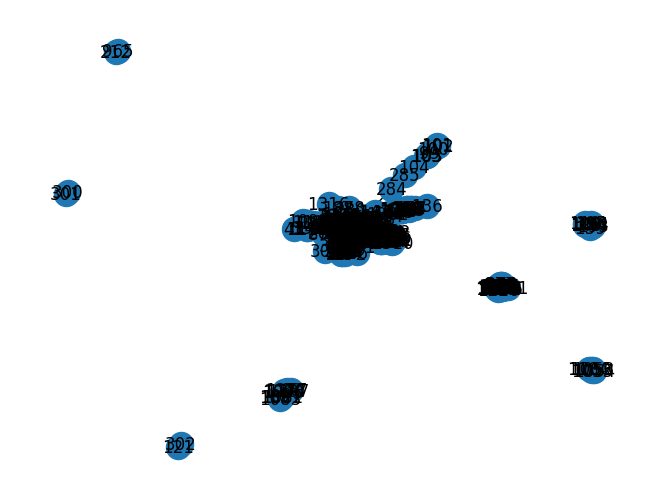

In [69]:
nx.draw(percolation_graph, with_labels = True)

In [70]:
cliques_3[3]

['mappum', 'mafintosh', 'mikeal', 'mcanthony', 'kustomzone']

In [72]:
def find_overlapping_communities(communities):
     overlapping_communities = []

     for i, community_i in enumerate(communities):
         for j, community_j in enumerate(communities):
             if i != j:  # Avoid comparing the same community
                 common_nodes = community_i.intersection(community_j)
                 if common_nodes:
                     overlapping_communities.append((i, j, common_nodes))

     return overlapping_communities

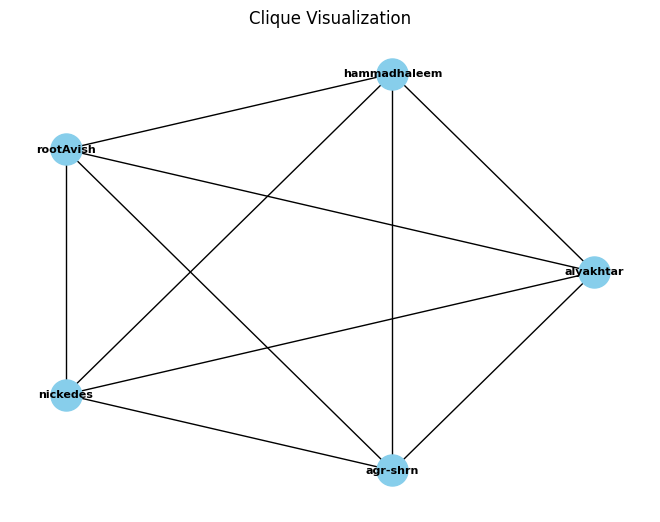

In [73]:
clique_visualization_graph = nx.Graph()

 # Add nodes to the visualization graph
#clique_visualization_graph.add_nodes_from(percolation_graph._node)

## Add edges between nodes (assuming complete graph within the clique)
#for i in range(len(cliques_3[0])):
#    for j in range(i + 1, len(cliques_3[0])):
#         clique_visualization_graph.add_edge(cliques_3[0][i], cliques_3[0][j])

for i in range(len(cliques_3[1])):
    for j in range(i + 1, len(cliques_3[1])):
         clique_visualization_graph.add_edge(cliques_3[1][i], cliques_3[1][j])

# # for i in range(len(cliques_9[2])):
# #     for j in range(i + 1, len(cliques_9[2])):
# #         clique_visualization_graph.add_edge(cliques_9[2][i], cliques_9[2][j])

# for i in range(len(cliques_9[3])):
#     for j in range(i + 1, len(cliques_9[3])):
#         clique_visualization_graph.add_edge(cliques_9[3][i], cliques_9[3][j])

# for i in range(len(cliques_9[4])):
#     for j in range(i + 1, len(cliques_9[4])):
#         clique_visualization_graph.add_edge(cliques_9[4][i], cliques_9[4][j])

# for i in range(len(cliques_9[5])):
#     for j in range(i + 1, len(cliques_9[5])):
#         clique_visualization_graph.add_edge(cliques_9[5][i], cliques_9[5][j])


## Define layout for better visualization (e.g., Kamada-Kawai layout)
layout = nx.kamada_kawai_layout(clique_visualization_graph)

# # Draw the graph
nx.draw(clique_visualization_graph, pos=layout, with_labels=True, font_weight='bold', node_color='skyblue', node_size=500, font_size=8)

# # Add title
plt.title('Clique Visualization')

# # Show the plot
plt.show()

In [90]:
""" 
visualization_graph = nx.Graph()

# Add nodes and edges to the visualization graph
for i, community in enumerate(communities):
    visualization_graph.add_nodes_from(community)
    for j in community:
        for k in community:
             if j != k:
                 visualization_graph.add_edge(j, k)

layout = nx.kamada_kawai_layout(visualization_graph)

# # Draw the graph
nx.draw(visualization_graph, pos=layout, with_labels=True, font_weight='bold', node_color='skyblue', node_size=500, font_size=8)

# # Add title and show the plot
plt.title('Overlapping Communities Visualization')
plt.show()
"""

" \nvisualization_graph = nx.Graph()\n\n# Add nodes and edges to the visualization graph\nfor i, community in enumerate(communities):\n    visualization_graph.add_nodes_from(community)\n    for j in community:\n        for k in community:\n             if j != k:\n                 visualization_graph.add_edge(j, k)\n\nlayout = nx.kamada_kawai_layout(visualization_graph)\n\n# # Draw the graph\nnx.draw(visualization_graph, pos=layout, with_labels=True, font_weight='bold', node_color='skyblue', node_size=500, font_size=8)\n\n# # Add title and show the plot\nplt.title('Overlapping Communities Visualization')\nplt.show()\n"

In [82]:
c_3 = list(nx.community.k_clique_communities(network,k=4, cliques=cliques_3))

In [83]:
c_3

[frozenset({'1995parham',
            'Aaaaash',
            'AaronO',
            'AbhiAgarwal',
            'AllenFang',
            'AlvinYuXT',
            'AndreiCalazans',
            'AndyWendt',
            'AsceticBoy',
            'AxeMea',
            'BBcaptain',
            'BYK',
            'BernardoGO',
            'BestDingSheng',
            'BideoWego',
            'BinaryMuse',
            'Bloss',
            'Bunlong',
            'BuptStEve',
            'Carreau',
            'ChrisWren',
            'Cleam',
            'CommanderXL',
            'DamonOehlman',
            'DeveloperLx',
            'DiegoRBaquero',
            'DylanPiercey',
            'EPSON-LEE',
            'EQuimper',
            'Eamonnzhang',
            'FishPlusOrange',
            'Fishrock123',
            'FootballFan141',
            'FounderIsShadowWalker',
            'FreezeSoul',
            'GantMan',
            'Gavin-Gong',
            'Gbuomprisco',
            'GeniusF

In [84]:
overlapping_communities_3 = find_overlapping_communities(c_3)
print(overlapping_communities_3)
if overlapping_communities_3:
    print("Overlapping Communities:")
    for overlap_info in overlapping_communities_3:
         i, j, common_nodes = overlap_info
         print(f"Communities {i} and {j} overlap with nodes {common_nodes}")
else:
    print("No overlapping communities found.")

[(0, 2, frozenset({'YTLogos', 'kbroman', 'rich-iannone', 'mkearney'})), (0, 3, frozenset({'kbroman', 'daroczig', 'hrbrmstr', 'rich-iannone'})), (0, 4, frozenset({'afonsopacifer', 'sdras', 'deppbrazil', 'talitapagani', 'kvnol'})), (0, 6, frozenset({'gabrielpconceicao'})), (0, 7, frozenset({'koddsson'})), (0, 8, frozenset({'geekplux', 'fengmk2', 'linhuiw', 'island205'})), (0, 9, frozenset({'JonnyBanana'})), (0, 12, frozenset({'silky'})), (0, 13, frozenset({'rasbt', 'silky'})), (0, 15, frozenset({'sdras', 'sadlil'})), (0, 16, frozenset({'sonnylazuardi'})), (0, 19, frozenset({'Yukaii', 'bananaappletw'})), (0, 21, frozenset({'luojiyin1987', 'bradfitz'})), (0, 22, frozenset({'emilbayes', 'bcomnes', 'bredele', 'mafintosh'})), (0, 23, frozenset({'rasbt', 'ogrisel'})), (0, 25, frozenset({'mykeels', 'Hipheckts'})), (0, 26, frozenset({'answershuto', 'chenshenhai', 'libin1991', 'YanceyOfficial'})), (0, 27, frozenset({'micrologic'})), (0, 29, frozenset({'rasbt'})), (0, 30, frozenset({'ankitjain28ma

In [93]:
from collections import Counter 
users = [user for _, _, community in overlapping_communities_3 for user in community]

# Count the occurrences of each user
counter = Counter(users)

# Find the user that appears most frequently
most_common_user, frequency = counter.most_common(1)[0]
print(counter)

print(f"The user that appears most frequently in the overlapping communities is '{most_common_user}' with a frequency of {frequency}.")

['YTLogos', 'kbroman', 'rich-iannone', 'mkearney', 'kbroman', 'daroczig', 'hrbrmstr', 'rich-iannone', 'afonsopacifer', 'sdras', 'deppbrazil', 'talitapagani', 'kvnol', 'gabrielpconceicao', 'koddsson', 'geekplux', 'fengmk2', 'linhuiw', 'island205', 'JonnyBanana', 'silky', 'rasbt', 'silky', 'sdras', 'sadlil', 'sonnylazuardi', 'Yukaii', 'bananaappletw', 'luojiyin1987', 'bradfitz', 'emilbayes', 'bcomnes', 'bredele', 'mafintosh', 'rasbt', 'ogrisel', 'mykeels', 'Hipheckts', 'answershuto', 'chenshenhai', 'libin1991', 'YanceyOfficial', 'micrologic', 'rasbt', 'ankitjain28may', 'answershuto', 'libin1991', 'afc163', 'chentsulin', 'sdras', 'bcherny', 'mcollina', 'miaowing', 'hrbrmstr', 'gabrielpconceicao', 'rich-iannone', 'dfalbel', 'YTLogos', 'kbroman', 'rich-iannone', 'mkearney', 'kbroman', 'rich-iannone', 'rich-iannone', 'kbroman', 'daroczig', 'hrbrmstr', 'rich-iannone', 'kbroman', 'rich-iannone', 'hrbrmstr', 'rich-iannone', 'afonsopacifer', 'sdras', 'deppbrazil', 'talitapagani', 'kvnol', 'sdras

In [125]:
community_ids = [id for community_id_pair in overlapping_communities_3 for id in community_id_pair[:2]]

# Count the occurrences of each community ID
counter = Counter(community_ids)
print(counter)

# Find the community ID that appears most frequently
most_common_community_id, frequency = counter.most_common(1)[0]

print(f"The most overlapped community ID is {most_common_community_id} with a frequency of {frequency}.")


Counter({0: 46, 13: 10, 29: 10, 6: 8, 15: 8, 23: 8, 35: 8, 2: 6, 3: 6, 4: 6, 12: 6, 33: 6, 11: 6, 26: 4, 27: 4, 32: 4, 5: 4, 34: 4, 7: 2, 8: 2, 9: 2, 16: 2, 19: 2, 21: 2, 22: 2, 25: 2, 30: 2, 10: 2, 17: 2, 31: 2, 28: 2})
The most overlapped community ID is 0 with a frequency of 46.


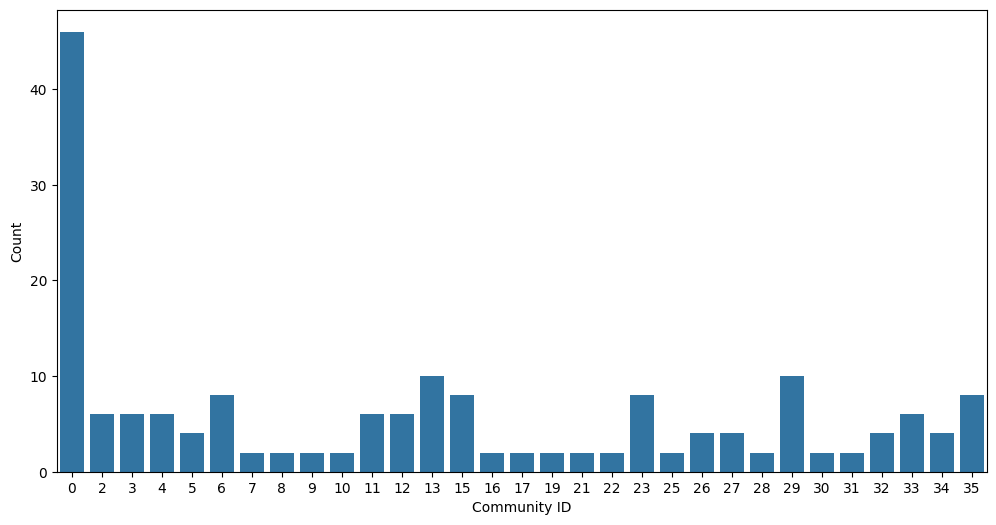

In [128]:
import seaborn as sns

# Create a DataFrame from the data
df = pd.DataFrame(list(counter.items()), columns=['Community ID', 'Count'])

# Create a bar plot
plt.figure(figsize=(12, 6))  # You can adjust the size of the figure as needed
sns.barplot(x='Community ID', y='Count', data=df)

# Show the plot
plt.show()

In [132]:
from collections import defaultdict
community_connections = defaultdict(lambda: defaultdict(int))

# Iterate over the data
for community_id1, community_id2, _ in overlapping_communities_3:
    # Increment the count for this pair of communities
    community_connections[community_id1][community_id2] += 0
    community_connections[community_id2][community_id1] += 0

# Now 'community_connections' contains the counts of connections between each pair of communities

# For example, to get the number of times community 0 is connected to community 1
print(community_connections[0].keys())

dict_keys([2, 3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 19, 21, 22, 23, 25, 26, 27, 29, 30, 32, 33, 35])


In [113]:
user_community_counts = defaultdict(lambda: defaultdict(int))

# Iterate over the data
for community_id1, community_id2, users in overlapping_communities_3:
    for user in users:
        # Increment the count for each community the user is part of
        user_community_counts[user][community_id1] += 1
        user_community_counts[user][community_id2] += 1


# For example, to get the number of times 'YTLogos' appears in community 1
print(user_community_counts['rich-iannone'])

defaultdict(<class 'int'>, {0: 6, 2: 6, 3: 6, 35: 6})


/mnt/Development-Main/ngoding-env/anaconda3/envs/Spotify_Analysis_PHX/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


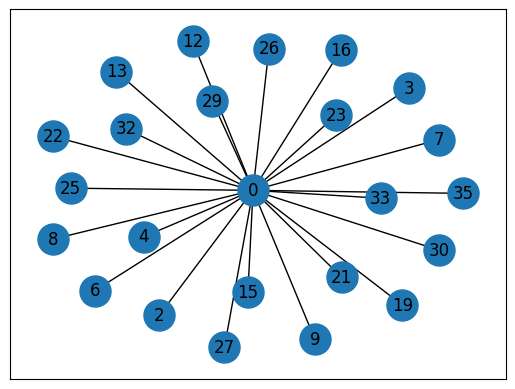

In [136]:
connections = [2, 3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 19, 21, 22, 23, 25, 26, 27, 29, 30, 32, 33, 35]

# Create a new graph
G = nx.Graph()

# Add an edge from node 0 to each node in 'connections'
for node in connections:
    G.add_edge(0, node)

# Draw the graph using the spring layout
pos = nx.spring_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, cmap=plt.cm.Blues, node_size=500)

# Draw the edges
nx.draw_networkx_edges(G, pos)

# Draw the labels
nx.draw_networkx_labels(G, pos)

# Show the plot
plt.show()